## This is a PyTorch implementation of Kaggle Competition Dataset : Dogs vs. Cats

### Importing libraries

In [1]:
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import os
import torch.optim as optim
from torch.utils.data import DataLoader
import torch

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Viewing data

In [3]:
image = cv2.imread("./data/train/cat.0.jpg")

In [4]:
image_copy = image.copy()

In [5]:
image_copy = cv2.resize(image_copy, (250,250))

In [6]:
cv2.imshow('image', image)
cv2.imshow('image_copy', image_copy)

In [7]:
cv2.waitKey(0)
cv2.destroyAllWindows()

### Loading Dataset and Relevant transforms

In [8]:
from torchvision import transforms, utils
from data_load import DogsCatsDataset
from data_load import Normalize, Rescale, RandomCrop, ToTensor

data_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(230),
                                     Normalize(),
                                     ToTensor()])

In [9]:
dogdataset = DogsCatsDataset(root_dir="./data/train/")

In [10]:
transformed_dataset = DogsCatsDataset(root_dir="./data/train/", transform=data_transform)

In [11]:
print('Number of images: ', len(transformed_dataset))

Number of images:  25000


0 (500, 374, 3) 0
1 (349, 468, 3) 0
2 (499, 375, 3) 0


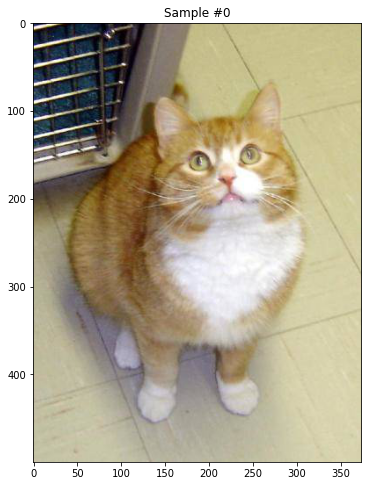

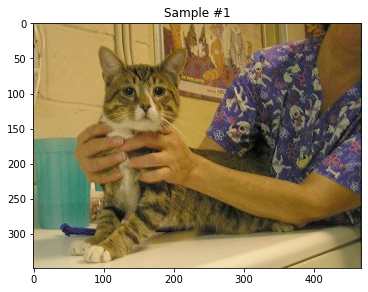

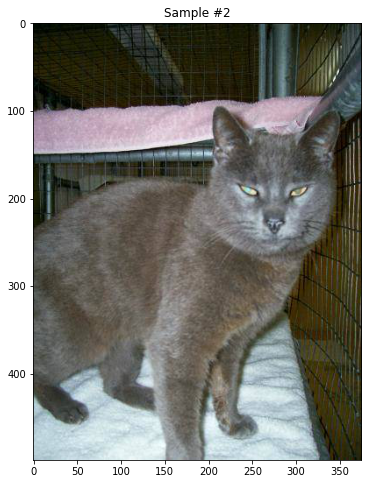

In [12]:
num_to_display = 3

for i in range(num_to_display):
    
    # define the size of images
    fig = plt.figure(figsize=(20,10))
    
    # randomly select a sample
    rand_i = np.random.randint(0, len(dogdataset))
    sample = dogdataset[rand_i]

    # print the shape of the image and keypoints
    print(i, sample['image'].shape, sample['category'])

    ax = plt.subplot(1, num_to_display, i + 1)
    ax.set_title('Sample #{}'.format(i))
    plt.imshow(sample['image'])

In [13]:
for i in range(5):
    sample = transformed_dataset[i]
    print(sample['image'].size())

torch.Size([1, 230, 230])
torch.Size([1, 230, 230])
torch.Size([1, 230, 230])
torch.Size([1, 230, 230])
torch.Size([1, 230, 230])


## Training the Network
### Loading network

In [14]:
from model import Net
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout(p=0.3, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv3_drop): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=80000, out_features=2086, bias=True)
  (fc1_drop): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=2086, out_features=1024, bias=True)
  (fc2_drop): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=1024, out_features=2, bias=True)
)


### Batching and Loading Data

In [15]:
batch_size = 128
train_loader = DataLoader(transformed_dataset,
                          batch_size=batch_size,
                          shuffle=True)

### Defining Loss and Optimization

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)

In [17]:
expr_lr_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[3, 7], gamma=0.1)

In [18]:
from tqdm import tqdm
from torch.autograd import Variable

In [19]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in tqdm(enumerate(train_loader)):
            
            # convert variables to floats for regression loss
            
            #image, category = Variable(data['image']), Variable(data['category'])
            image = data['image']
            category = data['category']
            image = image.type(torch.FloatTensor)
            
            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # forward pass to get outputs
            output = net(image)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output, category)


            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()
            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()
            if batch_i % 5 == 4:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [20]:
n_epochs = 1
train_net(n_epochs)

5it [01:44, 20.11s/it]

Epoch: 1, Batch: 5, Avg. Loss: 916.9015313565731


10it [03:24, 19.90s/it]

Epoch: 1, Batch: 10, Avg. Loss: 0.47005723118782045


15it [04:57, 18.91s/it]

Epoch: 1, Batch: 15, Avg. Loss: 0.3527701497077942


20it [06:30, 18.50s/it]

Epoch: 1, Batch: 20, Avg. Loss: 0.34633997082710266


25it [08:00, 18.14s/it]

Epoch: 1, Batch: 25, Avg. Loss: 0.34724920988082886


30it [09:30, 17.99s/it]

Epoch: 1, Batch: 30, Avg. Loss: 0.34630413055419923


35it [11:02, 18.30s/it]

Epoch: 1, Batch: 35, Avg. Loss: 0.3480881035327911


40it [12:35, 18.74s/it]

Epoch: 1, Batch: 40, Avg. Loss: 0.34593496322631834


45it [14:07, 18.45s/it]

Epoch: 1, Batch: 45, Avg. Loss: 0.3467144310474396


50it [15:39, 18.26s/it]

Epoch: 1, Batch: 50, Avg. Loss: 0.34651180505752566


55it [17:14, 18.65s/it]

Epoch: 1, Batch: 55, Avg. Loss: 0.3467440903186798


60it [18:49, 18.91s/it]

Epoch: 1, Batch: 60, Avg. Loss: 0.3471343994140625


65it [20:24, 18.85s/it]

Epoch: 1, Batch: 65, Avg. Loss: 0.3470535635948181


70it [22:01, 19.11s/it]

Epoch: 1, Batch: 70, Avg. Loss: 0.3461479902267456


75it [23:41, 19.93s/it]

Epoch: 1, Batch: 75, Avg. Loss: 0.3460183084011078


80it [25:15, 19.04s/it]

Epoch: 1, Batch: 80, Avg. Loss: 0.34712910652160645


85it [26:57, 20.67s/it]

Epoch: 1, Batch: 85, Avg. Loss: 0.3469489336013794


90it [28:48, 21.84s/it]

Epoch: 1, Batch: 90, Avg. Loss: 0.34720516204833984


95it [30:25, 19.65s/it]

Epoch: 1, Batch: 95, Avg. Loss: 0.346606969833374


100it [32:05, 20.12s/it]

Epoch: 1, Batch: 100, Avg. Loss: 0.3465437233448029


105it [33:39, 19.10s/it]

Epoch: 1, Batch: 105, Avg. Loss: 0.3470837652683258


110it [35:25, 21.23s/it]

Epoch: 1, Batch: 110, Avg. Loss: 0.34633355140686034


115it [37:05, 19.84s/it]

Epoch: 1, Batch: 115, Avg. Loss: 0.3467512369155884


120it [38:42, 19.80s/it]

Epoch: 1, Batch: 120, Avg. Loss: 0.3459348976612091


125it [40:32, 22.45s/it]

Epoch: 1, Batch: 125, Avg. Loss: 0.3477775096893311


130it [42:16, 20.86s/it]

Epoch: 1, Batch: 130, Avg. Loss: 0.34775547981262206


135it [44:01, 21.47s/it]

Epoch: 1, Batch: 135, Avg. Loss: 0.3466072976589203


140it [45:58, 23.00s/it]

Epoch: 1, Batch: 140, Avg. Loss: 0.3456532537937164


145it [47:46, 22.06s/it]

Epoch: 1, Batch: 145, Avg. Loss: 0.34768070578575133


150it [49:45, 22.97s/it]

Epoch: 1, Batch: 150, Avg. Loss: 0.346995884180069


155it [51:30, 21.10s/it]

Epoch: 1, Batch: 155, Avg. Loss: 0.34815353751182554


160it [53:26, 22.25s/it]

Epoch: 1, Batch: 160, Avg. Loss: 0.3469731271266937


165it [55:15, 22.44s/it]

Epoch: 1, Batch: 165, Avg. Loss: 0.3468075513839722


170it [57:03, 21.36s/it]

Epoch: 1, Batch: 170, Avg. Loss: 0.3469874143600464


175it [58:48, 20.72s/it]

Epoch: 1, Batch: 175, Avg. Loss: 0.3476442813873291


180it [1:00:40, 22.56s/it]

Epoch: 1, Batch: 180, Avg. Loss: 0.34651845693588257


185it [1:02:26, 21.39s/it]

Epoch: 1, Batch: 185, Avg. Loss: 0.34681803584098814


190it [1:04:07, 20.16s/it]

Epoch: 1, Batch: 190, Avg. Loss: 0.3466472029685974


195it [1:05:47, 20.11s/it]

Epoch: 1, Batch: 195, Avg. Loss: 0.345738023519516


196it [1:05:55, 20.18s/it]

Finished Training


In [30]:
test_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(230),
                                     Normalize(),
                                     ToTensor()])

In [31]:
testdataset = DogsCatsDataset(root_dir="./data/test1/", transform=test_transform)
test_loader = DataLoader(testdataset,batch_size=10,num_workers=0)

In [32]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        category = sample['category']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_label = net(images)
        
        # break after first image is tested
        if i == 0:
            return images, output_label, category

In [33]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, category = net_sample_output()

In [38]:
category

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
import numbers

tensor(1)
tensor([1])
tensor(2)
tensor([1])
tensor(3)
tensor([1])
tensor(4)
tensor([1])
tensor(5)
tensor([1])
tensor(6)
tensor([1])
tensor(7)
tensor([1])
tensor(8)
tensor([1])
tensor(9)
tensor([1])
tensor(10)
tensor([1])


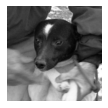

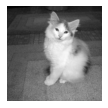

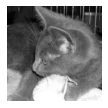

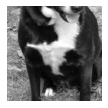

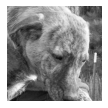

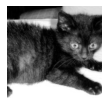

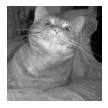

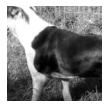

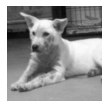

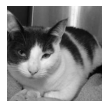

In [54]:

# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, category, batch_size=10):
    correct = 0
    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image
        
        # un-transform the predicted key_pts data
        predicted_label = test_outputs[i].data.max(0, keepdim=True)[1]
        correct += predicted_label.eq(category[i].data.view_as(predicted_label)).cpu().sum()
        print(correct)
        #predicted_label = predicted_label.numpy()
        print(predicted_label)
        plt.imshow(np.squeeze(image), cmap='gray')
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, category)

In [55]:
model_dir = 'models/'
model_name = 'cat_dog_1.pt'

torch.save(net.state_dict(),model_dir+model_name)